## 군집

### 3.5.1 k-평균 군집

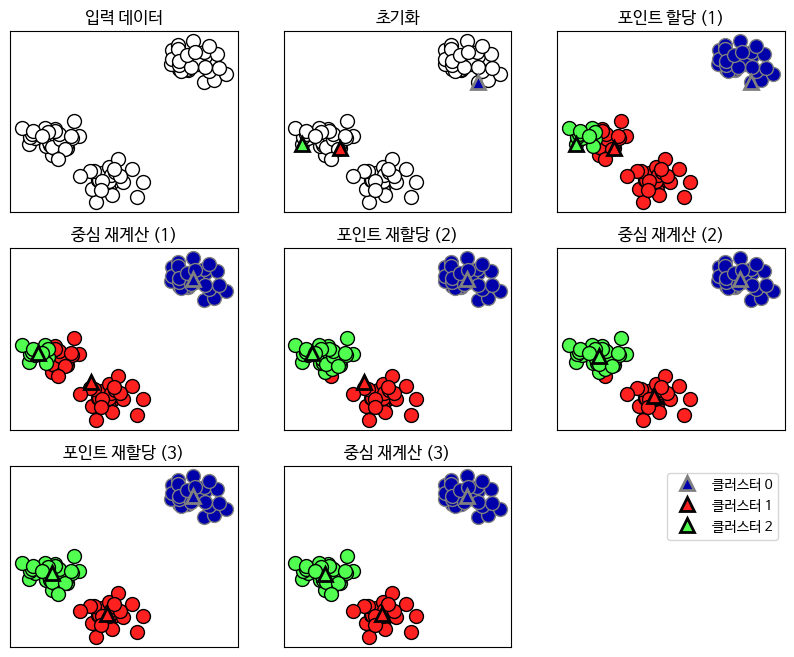

In [53]:
mglearn.plots.plot_kmeans_algorithm()

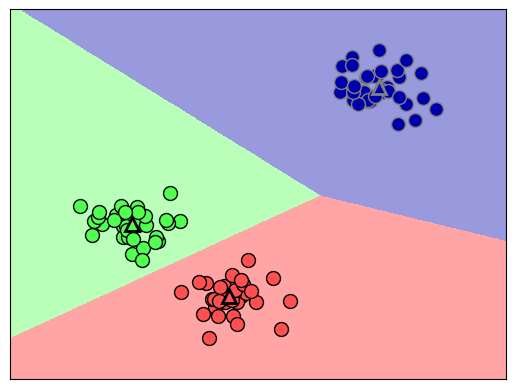

In [54]:
mglearn.plots.plot_kmeans_boundaries()

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [56]:
print(kmeans.labels_)

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [57]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


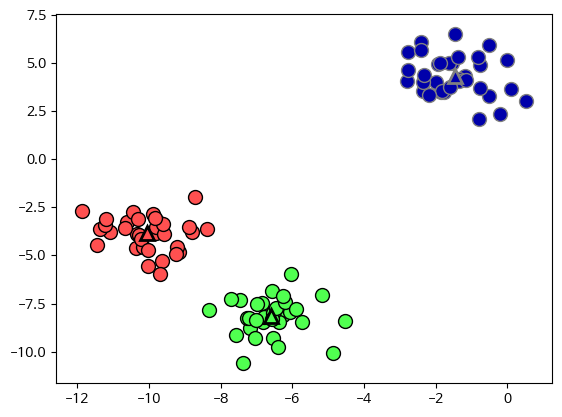

In [58]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show() # 책에는 없음

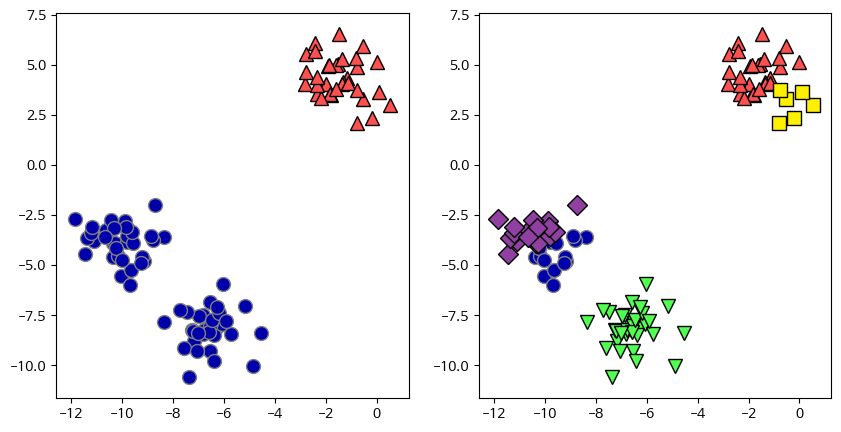

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show() # 책에는 없음

#### k-평균 알고리즘이 실패하는 경우

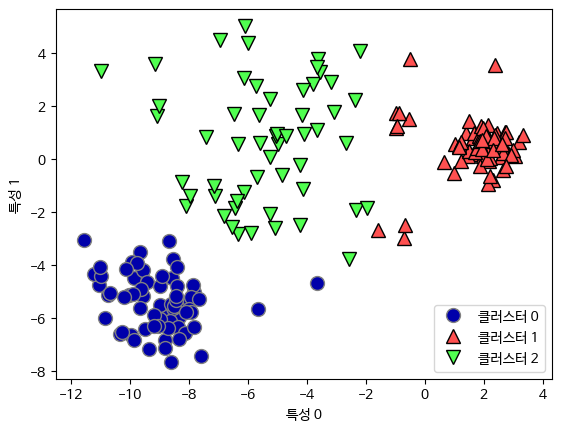

In [60]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

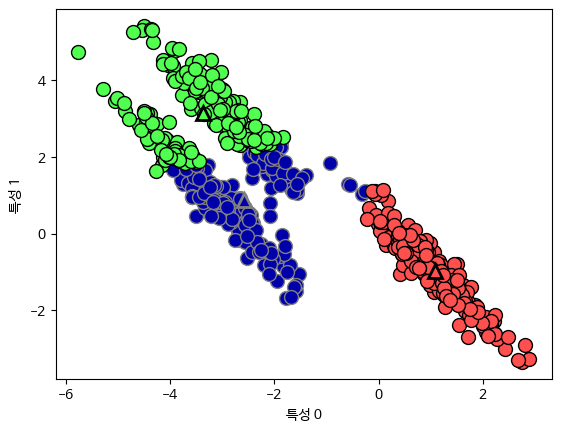

In [61]:
# 무작위로 클러스터 데이터 생성합니다
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

Text(0, 0.5, '특성 1')

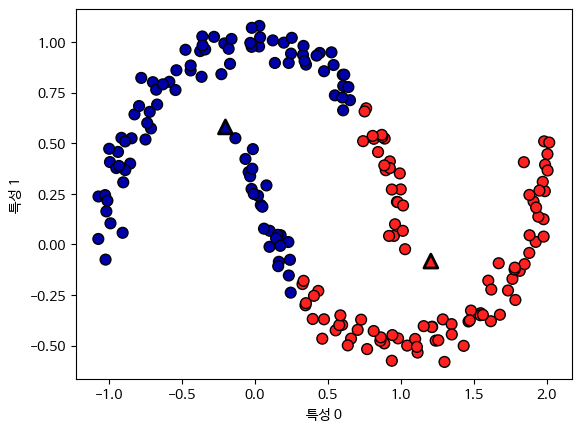

In [62]:
# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣습니다)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### 벡터 양자화 또는 분해 메소드로서의 k-평균

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, init='nndsvd', max_iter=1000, tol=1e-2, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

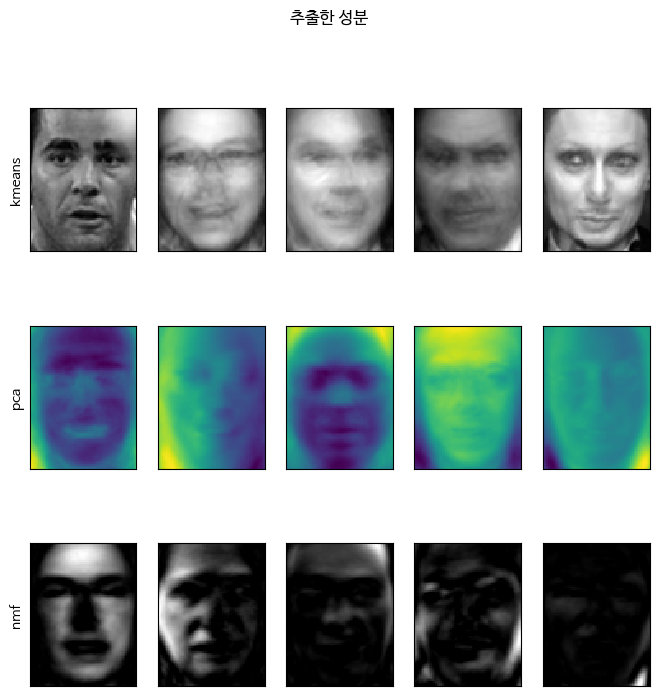

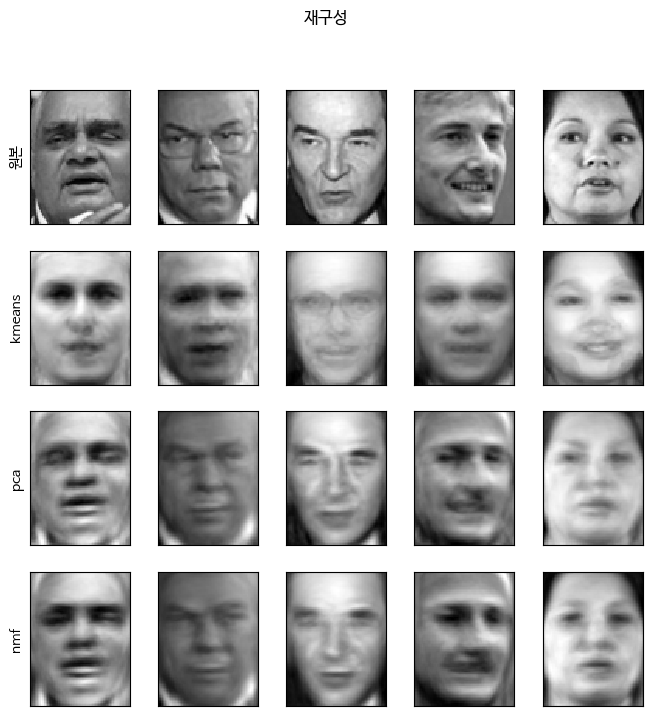

In [64]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show() # 책에는 없음

클러스터 레이블:
 [0 9 4 1 9 5 0 2 0 2 3 6 9 2 8 0 7 6 7 8 5 2 7 2 3 4 9 5 4 7 0 3 2 4 0 5 6
 0 8 4 6 3 7 4 9 3 0 8 4 2 8 6 5 1 2 0 7 2 7 3 6 1 9 0 2 1 3 9 3 1 6 1 6 4
 2 1 4 0 7 6 5 3 6 5 4 3 0 3 6 5 7 0 5 8 5 9 9 6 1 4 2 5 3 0 1 4 1 3 9 7 8
 3 3 1 0 9 7 5 6 0 0 8 4 3 4 8 0 4 2 5 0 8 1 6 2 9 2 1 5 0 4 4 7 3 3 0 4 2
 7 4 6 9 0 7 6 3 2 6 7 7 4 2 7 9 6 9 7 6 9 2 7 1 1 8 4 2 5 8 8 7 9 1 5 9 5
 7 3 2 1 8 1 7 0 0 4 8 5 4 3 9]


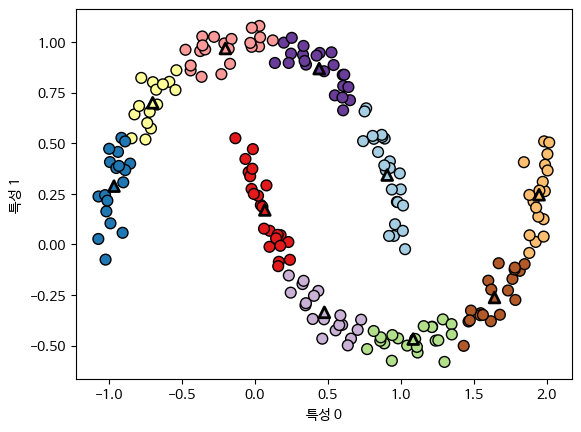

In [65]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

In [66]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[0.201 1.796 1.026 ... 0.511 1.526 1.14 ]
 [1.013 2.667 0.539 ... 1.715 2.556 0.12 ]
 [0.932 0.943 1.333 ... 0.754 0.8   1.749]
 ...
 [0.812 1.177 1.021 ... 0.915 1.124 1.49 ]
 [1.028 1.305 1.762 ... 0.347 0.879 1.981]
 [0.91  2.636 0.588 ... 1.607 2.497 0.045]]


#### 엘보우 방법

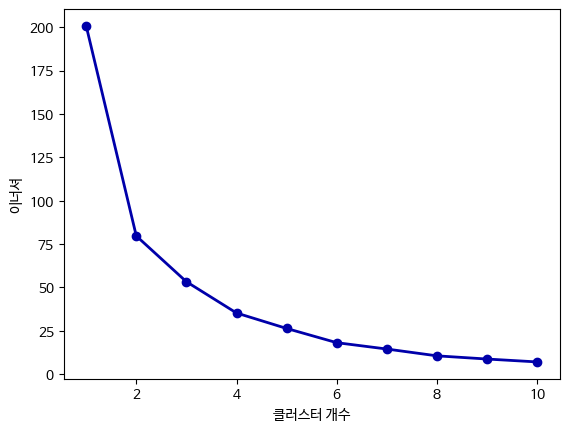

In [67]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('클러스터 개수')
plt.ylabel('이너셔')
plt.show()

### 3.5.2 병합 군집

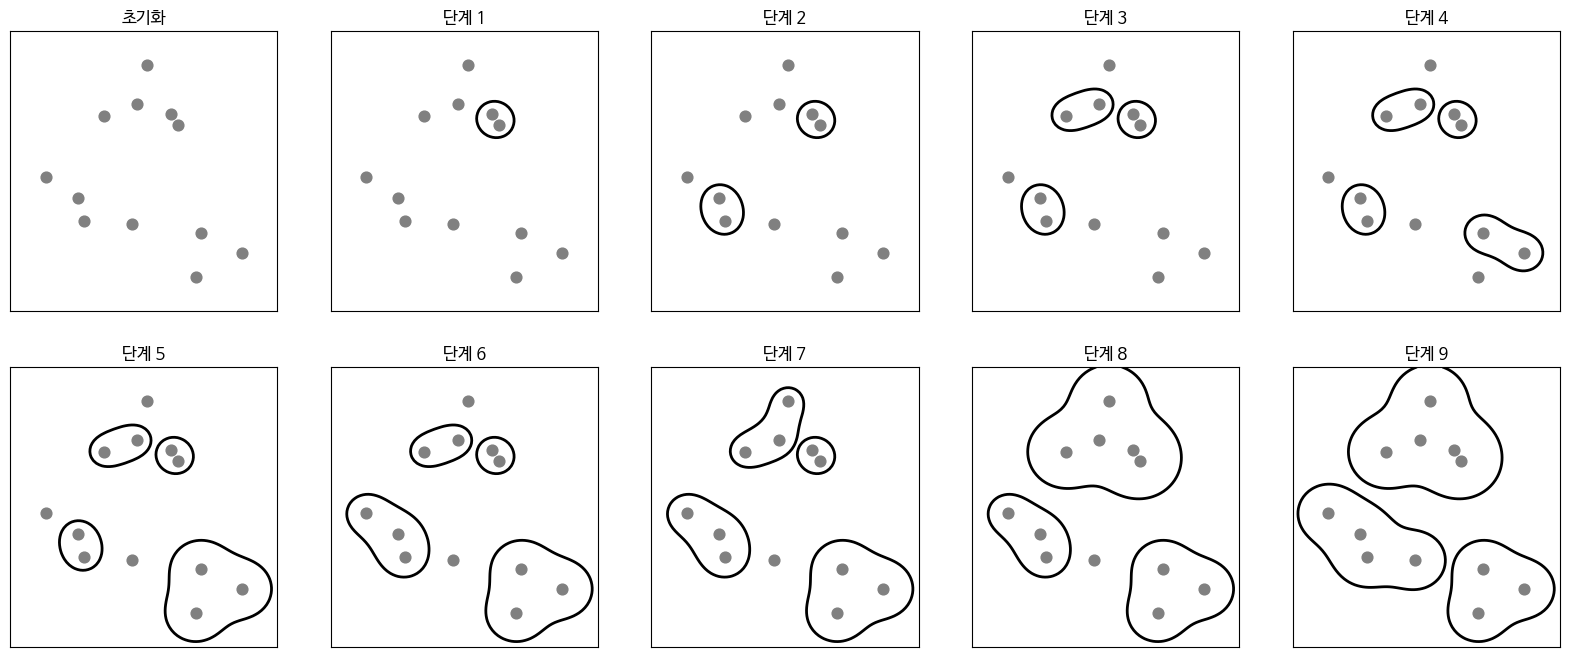

In [68]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, '특성 1')

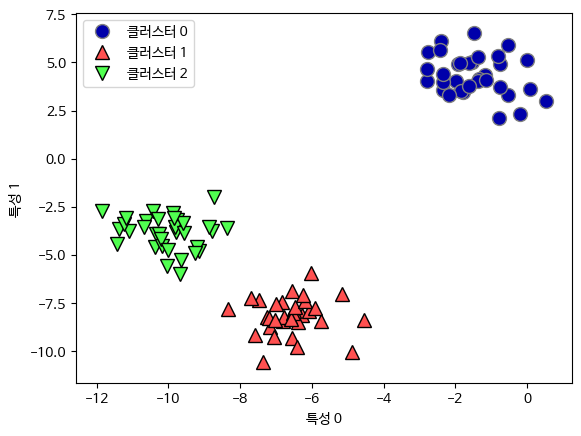

In [69]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### 계층적 군집과 덴드로그램(dendrograms)

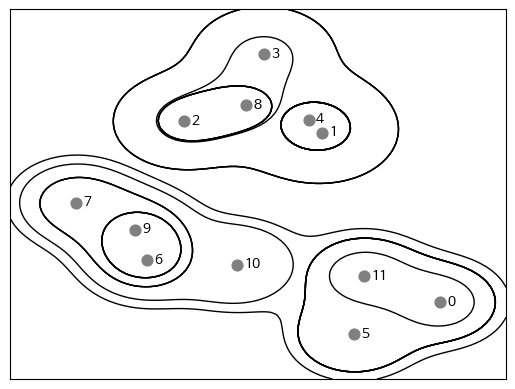

In [70]:
mglearn.plots.plot_agglomerative()

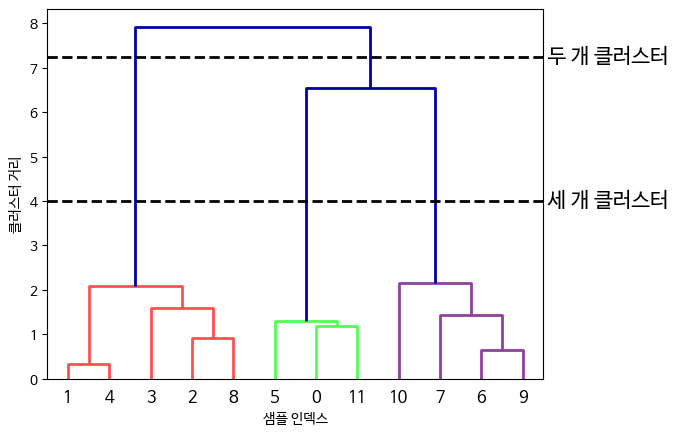

In [71]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 인덱스")
plt.ylabel("클러스터 거리")
plt.show()

In [72]:
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agg.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [73]:
print(agg.children_)

[[ 1  4]
 [ 6  9]
 [ 2  8]
 [ 0 11]
 [ 5 15]
 [ 7 13]
 [ 3 14]
 [12 18]
 [10 17]
 [16 20]
 [19 21]]


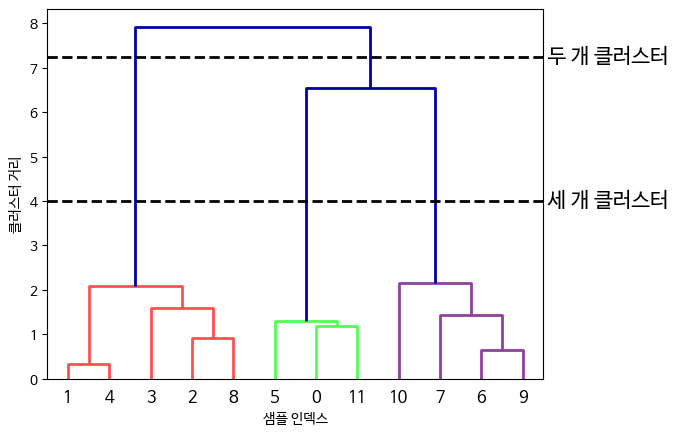

In [74]:
counts = np.zeros(agg.children_.shape[0])
n_samples = len(agg.labels_)
for i, merge in enumerate(agg.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # 리프 노드
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([agg.children_, agg.distances_, counts])
# 클러스터 간의 거리 정보가 담긴 linkage_matrix를 사용해 덴드로그램을 그립니다
dendrogram(linkage_matrix)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 인덱스")
plt.ylabel("클러스터 거리")
plt.show()

### 3.5.3 DBSCAN

In [75]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  클러스터: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]


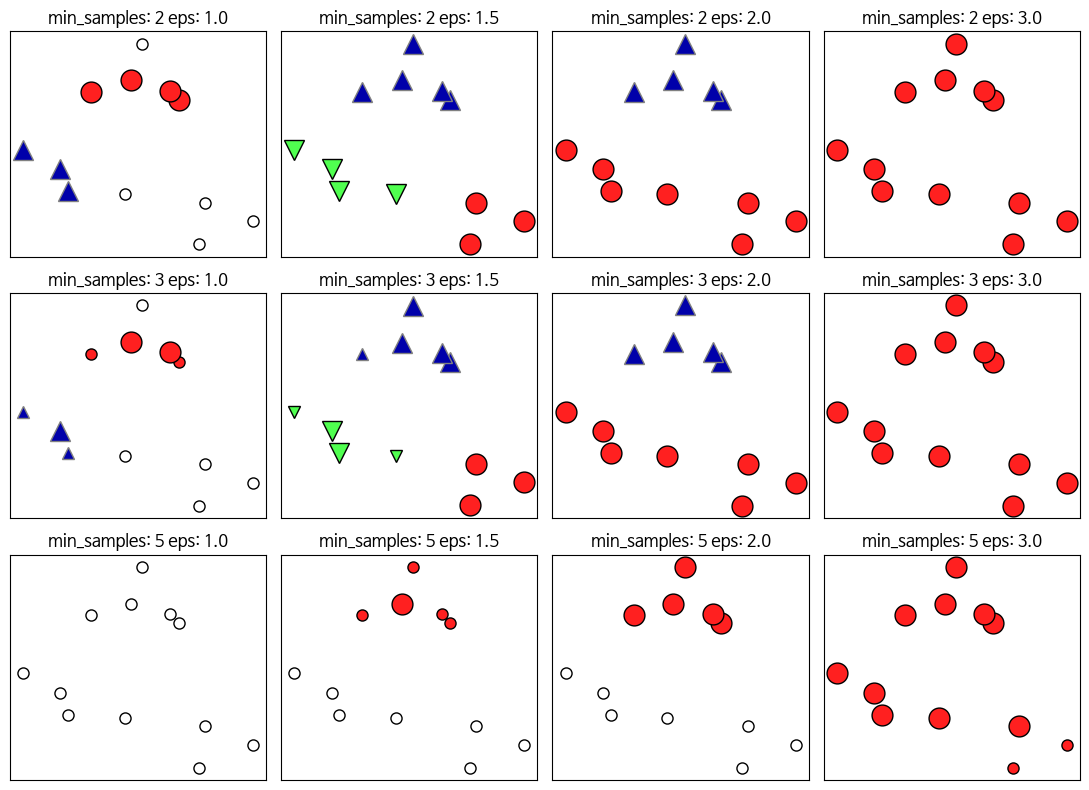

In [76]:
mglearn.plots.plot_dbscan()

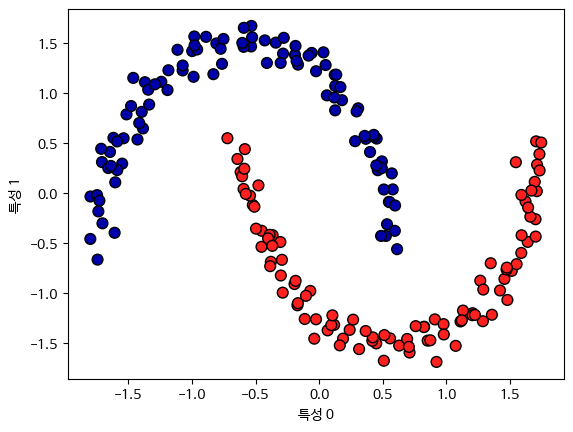

In [77]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

### 3.5.4 군집 알고리즘의 비교와 평가
#### 타겟값으로 군집 평가하기

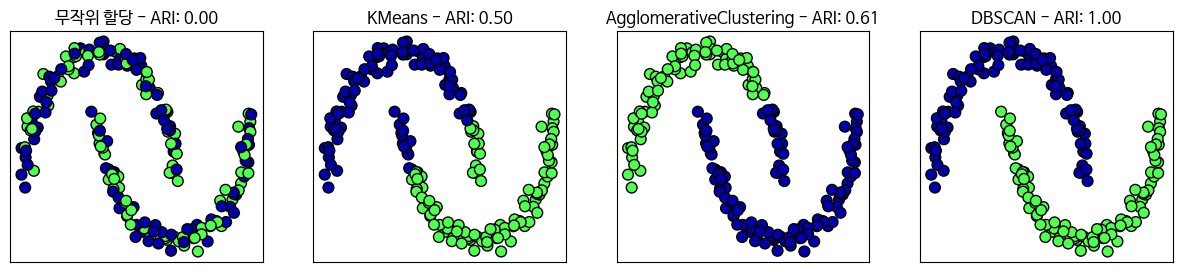

In [78]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

In [79]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 모든 레이블이 달라졌으므로 정확도는 0입니다
print("정확도: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1입니다
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.00
ARI: 1.00


#### 타겟값 없이 군집 평가하기

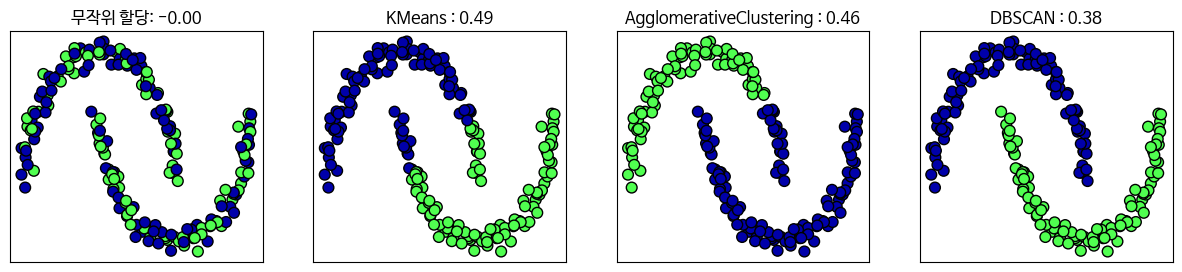

In [80]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

#### 얼굴 데이터셋으로 군집 알고리즘 비교

In [81]:
# LFW 데이터에서 고유얼굴을 찾은 다음 데이터를 변환합니다
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

#### DBSCAN으로 얼굴 데이터셋 분석

In [82]:
# 기본 매개변수로 DBSCAN을 적용합니다
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


In [83]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


In [84]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1  0]


In [85]:
# 잡음 포인트와 클러스터에 속한 포인트 수를 셉니다.
# bincount는 음수를 받을 수 없어서 labels에 1을 더했습니다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수입니다.
print("클러스터별 포인트 수:", np.bincount(labels + 1))

클러스터별 포인트 수: [  37 2026]


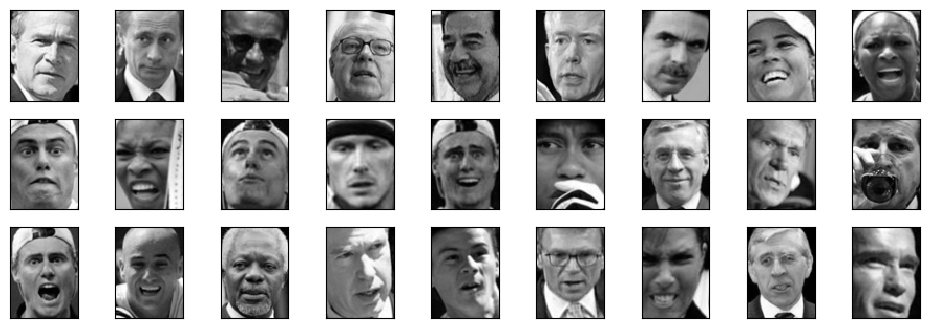

In [86]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape))

In [87]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps=", eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수:", len(np.unique(labels)))
    print("클러스터 크기:", np.bincount(labels + 1))


eps= 1
클러스터 수: 1
클러스터 크기: [2063]

eps= 3
클러스터 수: 1
클러스터 크기: [2063]

eps= 5
클러스터 수: 2
클러스터 크기: [2059    4]

eps= 7
클러스터 수: 8
클러스터 크기: [1954   75    4   14    6    4    3    3]

eps= 9
클러스터 수: 3
클러스터 크기: [1199  861    3]

eps= 11
클러스터 수: 2
클러스터 크기: [ 403 1660]

eps= 13
클러스터 수: 2
클러스터 크기: [ 119 1944]


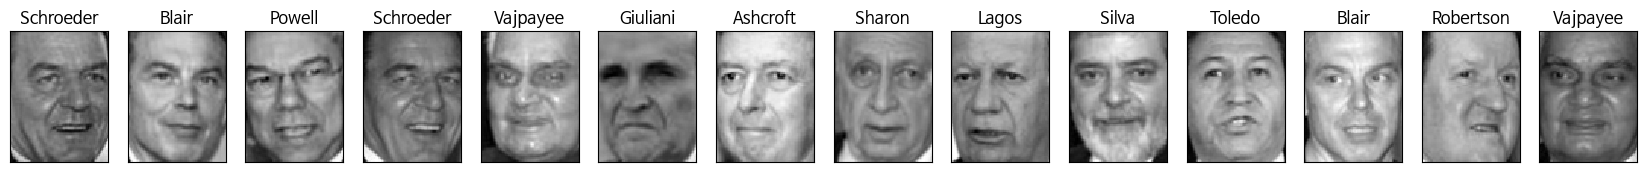

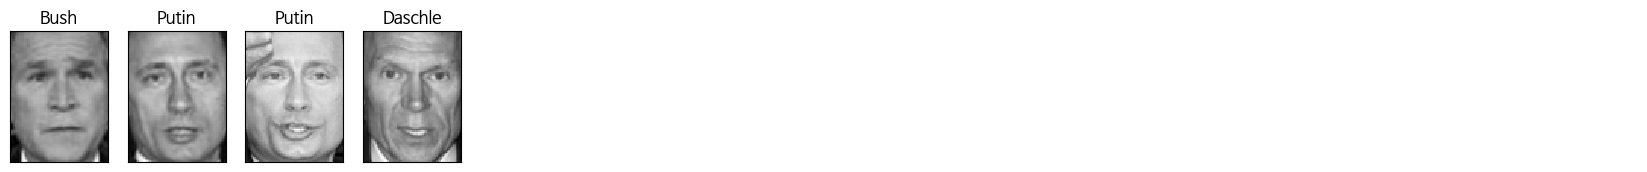

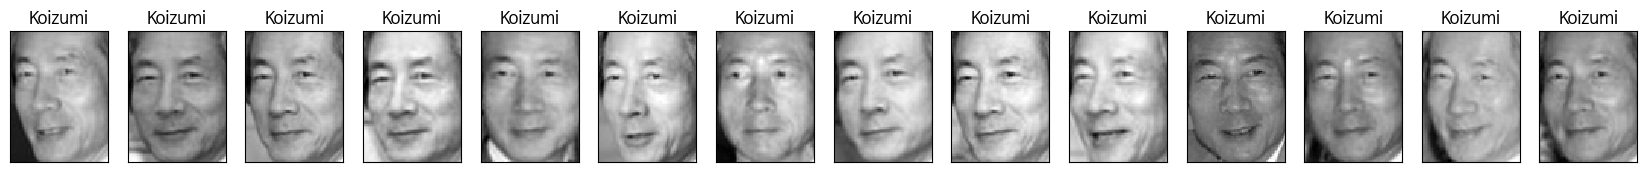

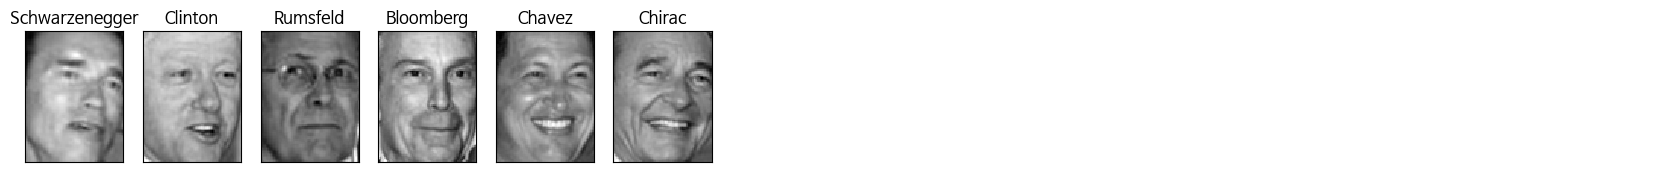

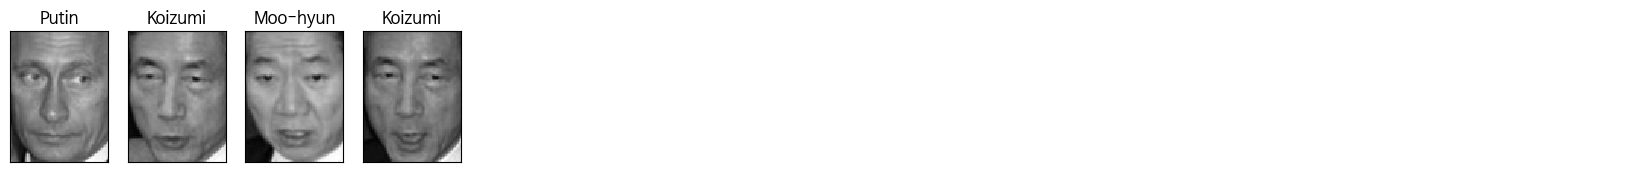

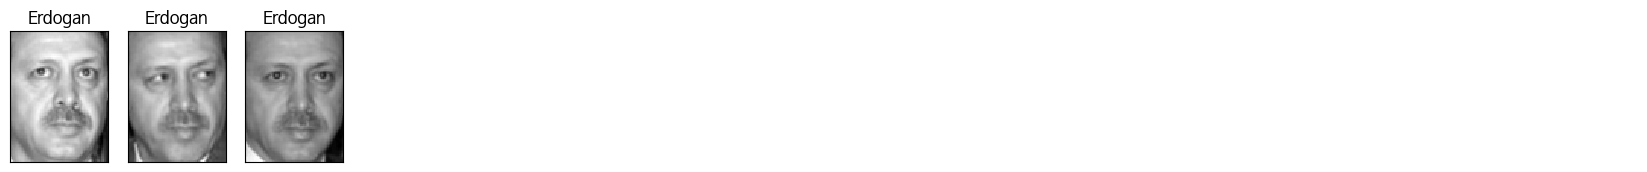

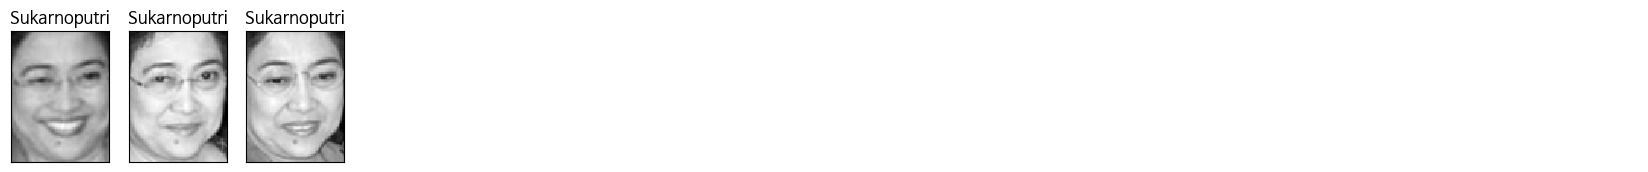

In [88]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')

#### k-평균으로 얼굴 데이터셋 분석하기

In [89]:
n_clusters = 10
# k-평균으로 클러스터를 추출합니다
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:", np.bincount(labels_km))

k-평균의 클러스터 크기: [122 286 202 220  60 327 363  80 205 198]


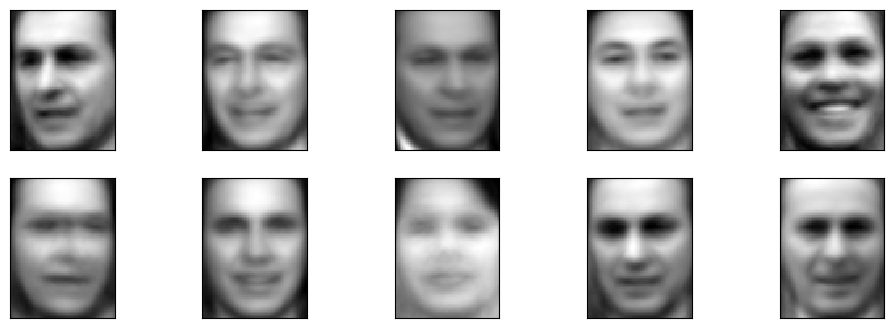

In [90]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape))

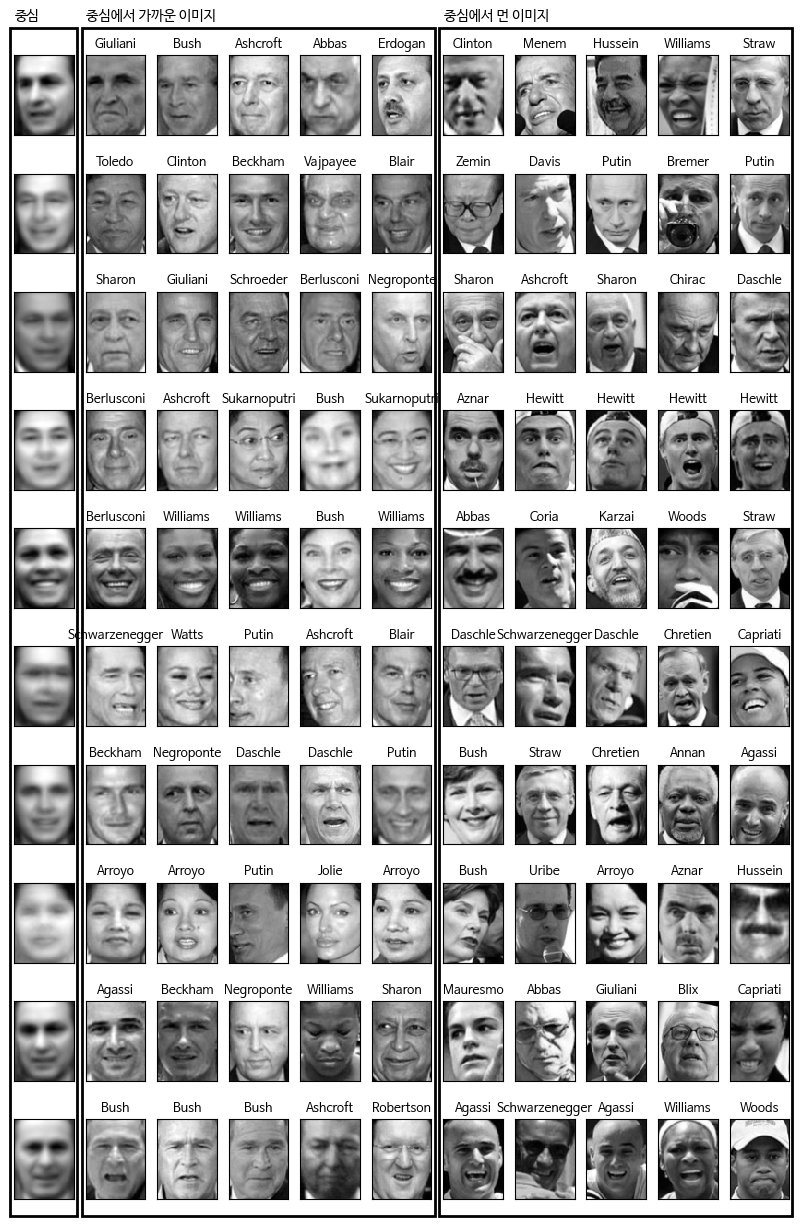

In [91]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

#### 병합 군집으로 얼굴 데이터셋 분석하기

In [92]:
# 병합 군집으로 클러스터를 추출합니다
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:",
       np.bincount(labels_agg))

병합 군집의 클러스터 크기: [264 100 275 553  49  64 546  52  51 109]


In [93]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


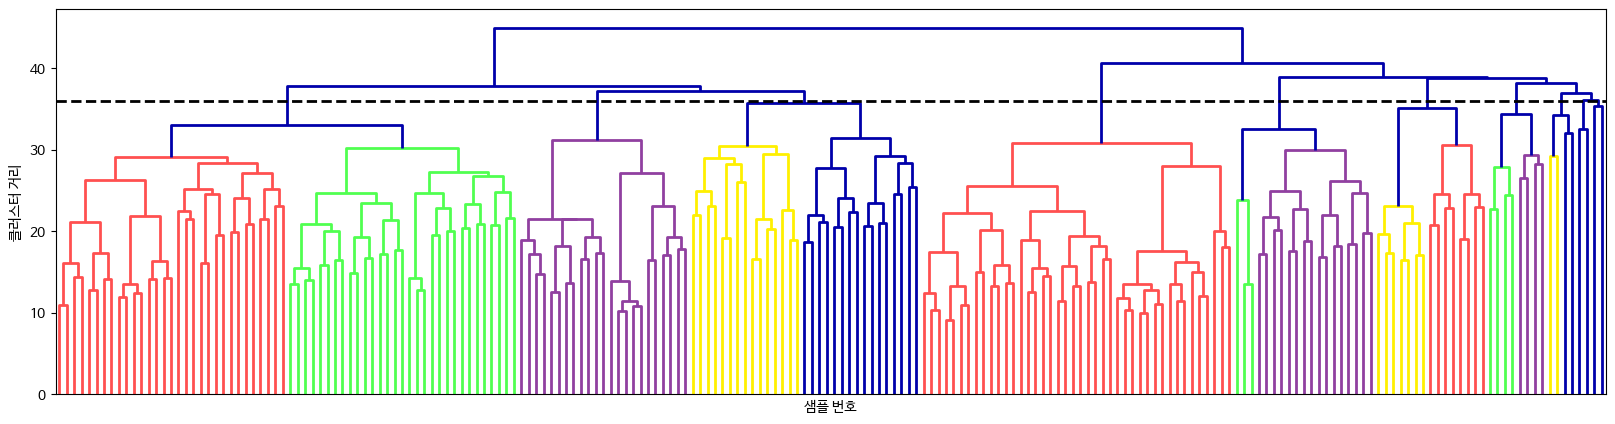

In [94]:
linkage_array = ward(X_pca)
# 클러스터 사이의 거리가 담겨있는 linkage_array로 덴드로그램을 그립니다
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

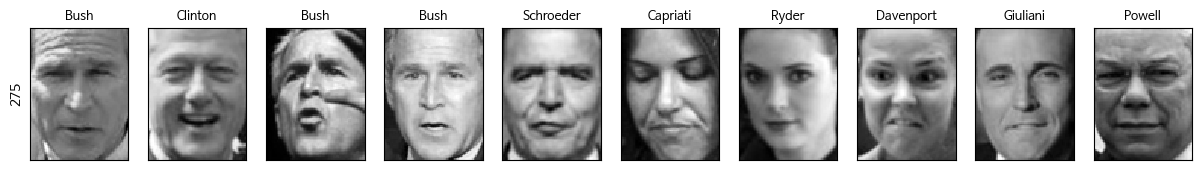

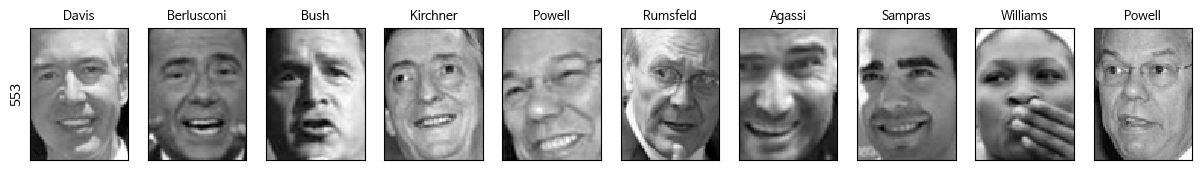

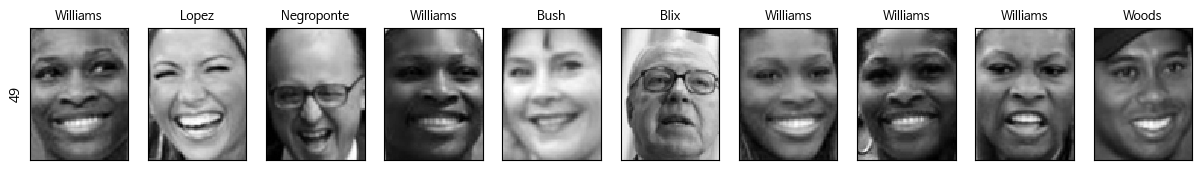

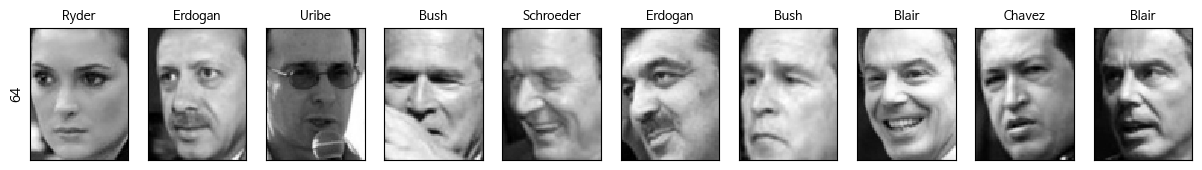

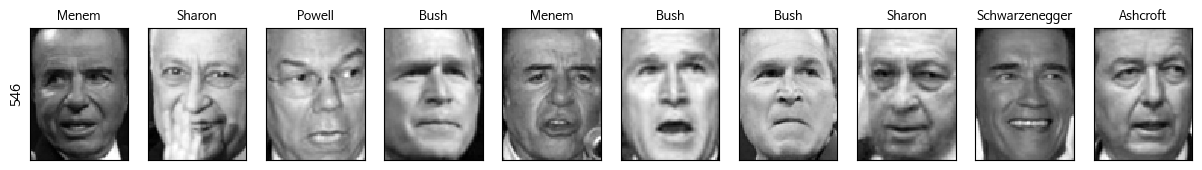

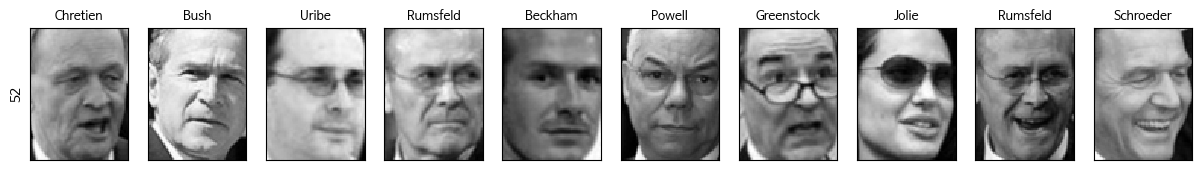

In [95]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

병합 군집의 클러스터 크기: [139  35  23   2 111  39 106  33   5 161  60  41  70  17  30  20 134  40
  23  38  56 264   4  35  44  16  29 135  25  37  42  34   3  17  31   3
  21  27  76  37]


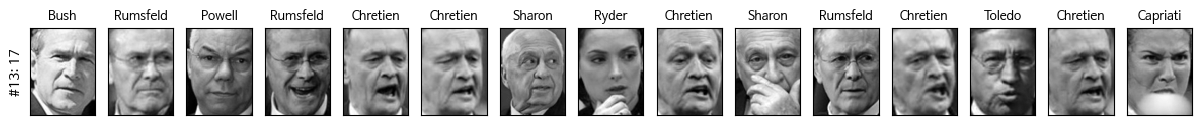

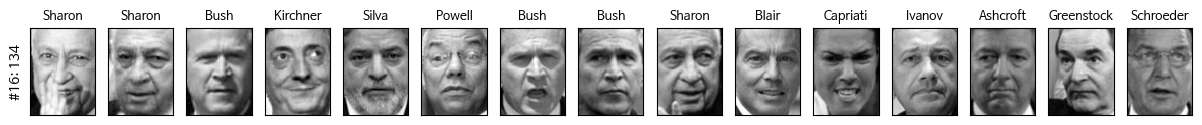

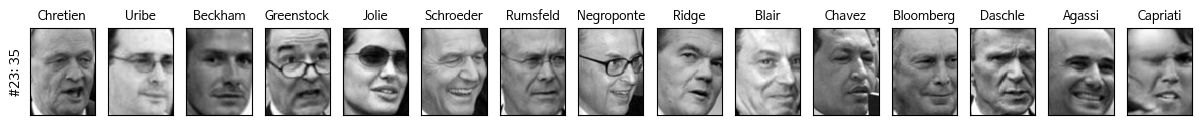

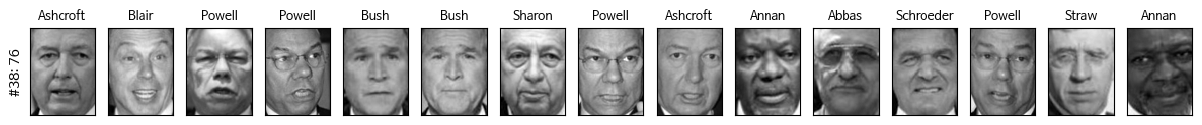

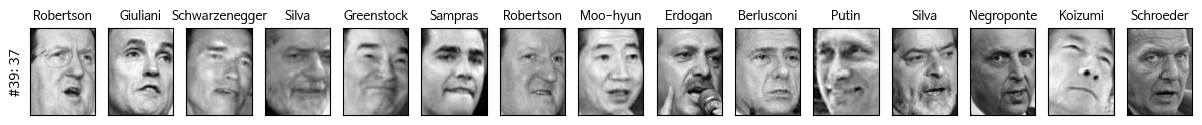

In [96]:
# 병합 군집으로 클러스터를 추출합니다
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]: # 흥미로운 클러스터 몇개를 골랐습니다
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)